In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load your dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [ ]:

# Preprocess the data
x_train = x_train.reshape(-1, 28 * 28).astype('float32')   / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
def trainModel(x_train, y_train):

  # Create the neural network model
  model = keras.Sequential([
      keras.layers.Dense(128, activation='relu', input_shape=(784,)),
      keras.layers.Dense(10, activation='softmax')
  ])

  # Compile the model
  model.compile(loss='categorical_crossentropy',  metrics=['accuracy'])

  # Train the model
  history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)

  # Evaluate the model
  train_loss, train_acc = model.evaluate(x_train, y_train)
  test_loss, test_acc = model.evaluate(x_test, y_test)

  return train_loss, test_loss

In [ ]:
kVals = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000]
trainLosses = []
testLosses = []

for k in kVals:

  xK_train = x_train[:k]
  yK_train = y_train[:k]

  trainLoss, testLoss = trainModel(xK_train, yK_train)

  trainLosses.append(trainLoss)
  testLosses.append(testLoss)

  print(k, "Done")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.2106 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7984 - loss: 0.6492
500 Done
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9599 - loss: 0.1966
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8621 - loss: 0.4861
1000 Done
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9556 - loss: 0.1766
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8598 - loss: 0.4530
2000 Done
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9693 - loss: 0.1310
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8943 - loss: 0.3410
3000 Done
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.1305
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9069 - loss: 0.3099
4000 Done
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9550 - loss: 0.1467
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.3394
5000 Done
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accur

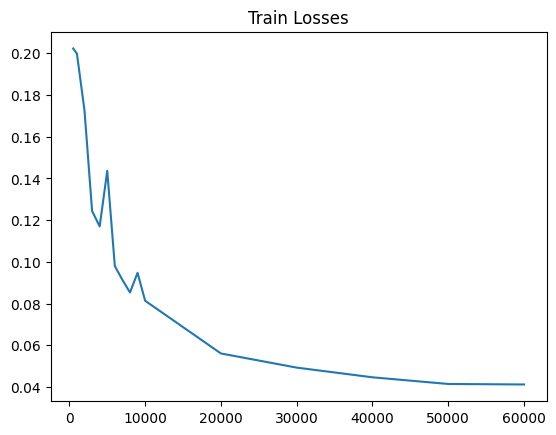

In [ ]:
import matplotlib.pyplot as plt

plt.plot(kVals, trainLosses)
plt.title("Train Losses")
plt.show()

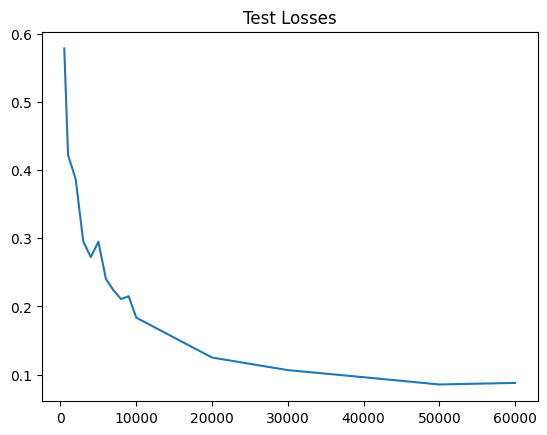

In [ ]:
plt.plot(kVals, testLosses)
plt.title("Test Losses")
plt.show()